In [1]:
import imports
imports.update_path()

from helpers import nx, np, ic, sp
from helpers_classes import get_emedding_coords_as_point, GraphData

from embedding import Embedding
from faces import Faces
import math

from simple_st_graph import graph_data

from copy import deepcopy

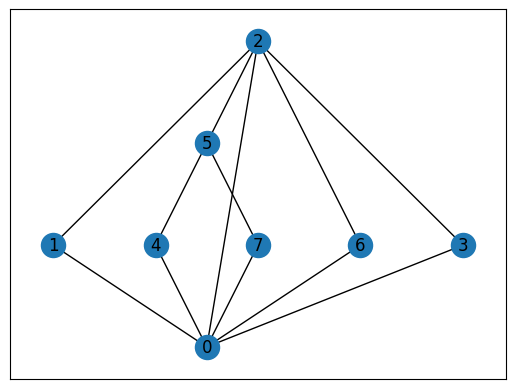

In [2]:
d = graph_data
nx.draw_networkx(d.G, pos=d.embed)

In [3]:
em = Embedding(d)
em.get_graph_embedding()
em.half_edges


{0: [(0, 2), (0, 7), (0, 6), (0, 3), (0, 1), (0, 4)],
 2: [(2, 3), (2, 6), (2, 0), (2, 5), (2, 1)],
 1: [(1, 2), (1, 0)],
 3: [(3, 0), (3, 2)],
 4: [(4, 5), (4, 0)],
 7: [(7, 0), (7, 5)],
 6: [(6, 0), (6, 2)],
 5: [(5, 2), (5, 7), (5, 4)]}

In [8]:
l = [2,3]
l.insert(0, [4,5])
l

[[4, 5], 2, 3]

In [4]:
fa = Faces(d, em.half_edges)
fa.create_edge_list()
fa.make_faces()


ic| self.starting_edge: (0, 2)
ic| p: <POINT (3 1)>


Exception: overlapping shape!

In [ ]:
fa.faces[0]

[(0, 2), (2, 3), (3, 0)]

In [ ]:
list(fa.faces[0][0])

[0, 2]

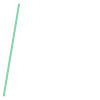

In [ ]:
nodes = [e[1] for e in fa.faces[0]]

[2, 3, 0]

In [ ]:
def create_shape():
    nodes = [e[1] for e in fa.faces[0]]
    p = get_emedding_coords_as_point(fa.embed, nodes)
    return sp.Polygon(sp.LinearRing(p)), p



In [ ]:
all_coords = get_emedding_coords_as_point(fa.embed, fa.G.nodes)
all_coords

[<POINT (1.5 0)>,
 <POINT (2 3)>,
 <POINT (0 1)>,
 <POINT (4 1)>,
 <POINT (1 1)>,
 <POINT (2 1)>,
 <POINT (3 1)>,
 <POINT (1.5 2)>]

In [ ]:
shape

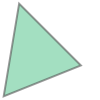

In [ ]:
shape, shape_points = create_shape()
shape

In [ ]:
diff = set(all_coords).difference(set(shape_points))
diff

{<POINT (0 1)>, <POINT (1 1)>, <POINT (1.5 2)>, <POINT (2 1)>, <POINT (3 1)>}

In [ ]:
for p in diff:
    if shape.intersects(p):
        ic(p)
        break

ic| p: <POINT (2 1)>
